In [3]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
from sklearn.metrics import auc
import os
import numpy as np
import pandas as pd 
import awkward as ak 
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
input_folder = "/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/single_electron/ntuples/"

In [3]:
f = uproot.open(file)
t =  f["ticlNtuplizer/tracksters"]
calo = f["ticlNtuplizer/simtrackstersCP"]
ass = f["ticlNtuplizer/associations"]

NameError: name 'file' is not defined

In [4]:
ass.keys()

NameError: name 'ass' is not defined

In [7]:
calo.keys()

['stsCP_event',
 'stsCP_NClusters',
 'stsCP_NTracksters',
 'stsCP_time',
 'stsCP_timeError',
 'stsCP_regressed_energy',
 'stsCP_raw_energy',
 'stsCP_raw_em_energy',
 'stsCP_raw_pt',
 'stsCP_raw_em_pt',
 'stsCP_barycenter_x',
 'stsCP_barycenter_y',
 'stsCP_barycenter_z',
 'stsCP_trackster_barycenter_eta',
 'stsCP_trackster_barycenter_phi',
 'stsCP_EV1',
 'stsCP_EV2',
 'stsCP_EV3',
 'stsCP_eVector0_x',
 'stsCP_eVector0_y',
 'stsCP_eVector0_z',
 'stsCP_sigmaPCA1',
 'stsCP_sigmaPCA2',
 'stsCP_sigmaPCA3',
 'stsCP_id_probabilities',
 'stsCP_vertices_indexes',
 'stsCP_vertices_x',
 'stsCP_vertices_y',
 'stsCP_vertices_z',
 'stsCP_vertices_energy',
 'stsCP_vertices_correctedEnergy',
 'stsCP_vertices_correctedEnergyUncertainty',
 'stsCP_vertices_multiplicity']

In [8]:
associations.append(ass.arrays[ "tsCLUE3D_recoToSim_CP", "tsCLUE3D_recoToSim_CP_score"])

TypeError: 'method' object is not subscriptable

In [4]:
import glob

files = glob.glob(f"{input_folder}/ntuples_13723002_*.root")

calos = [ ]
tracksters = [ ]
associations = [ ]

i = 0
N = 10
for file in files:
    if i >= N: break
    i+=1
    try:
        print('.', end="")
        f = uproot.open(file)
        t =  f["ticlNtuplizer/tracksters"]
        calo = f["ticlNtuplizer/simtrackstersCP"]
        ass = f["ticlNtuplizer/associations"]
        calos.append(calo.arrays(["stsCP_trackster_barycenter_eta","stsCP_trackster_barycenter_phi","stsCP_barycenter_z"]))
        tracksters.append(t.arrays(["raw_energy","trackster_barycenter_eta","trackster_barycenter_phi","barycenter_z"]))
        associations.append(ass.arrays([ "tsCLUE3D_recoToSim_CP", "tsCLUE3D_recoToSim_CP_score"]))
    except:
        print("error ", file)
        
df_calo = ak.concatenate(calos)
df_track = ak.concatenate(tracksters)
df_ass = ak.concatenate(associations)

..........

In [5]:
ak.num(df_track.trackster_barycenter_eta)

<Array [11, 4, 3, 5, 8, ... 2, 13, 9, 16, 9] type='1000 * int64'>

In [6]:
ak.num(df_calo.stsCP_trackster_barycenter_eta)

<Array [2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2] type='1000 * int64'>

In [7]:
df_ass[0].tolist()

{'tsCLUE3D_recoToSim_CP': [[1, 0],
  [1, 0],
  [1, 0],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1],
  [0, 1]],
 'tsCLUE3D_recoToSim_CP_score': [[1.0, 0.00027781579410657287],
  [1.0, 2.1496202862181235e-07],
  [1.0, 0.0005225788918323815],
  [1.0, 9.978775051422417e-05],
  [1.0, 2.988124079566384e-15],
  [1.0, 3.016348637174815e-05],
  [1.0, 1.6240299373748712e-05],
  [1.0, 0.0],
  [1.0, 4.832581907976419e-07],
  [1.0, 0.00019506074022501707],
  [1.0, 0.0001176771693280898]]}

In [33]:
t.keys()

['event',
 'NClusters',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'trackster_barycenter_eta',
 'trackster_barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity',
 'layer_cluster_seed']

In [25]:
df_calo.stsCP_trackster_barycenter_eta

<Array [[-2.58, -2.58, -2.94, ... 2.5, 2.5]] type='49449 * var * float32'>

Text(0, 1, 'phi')

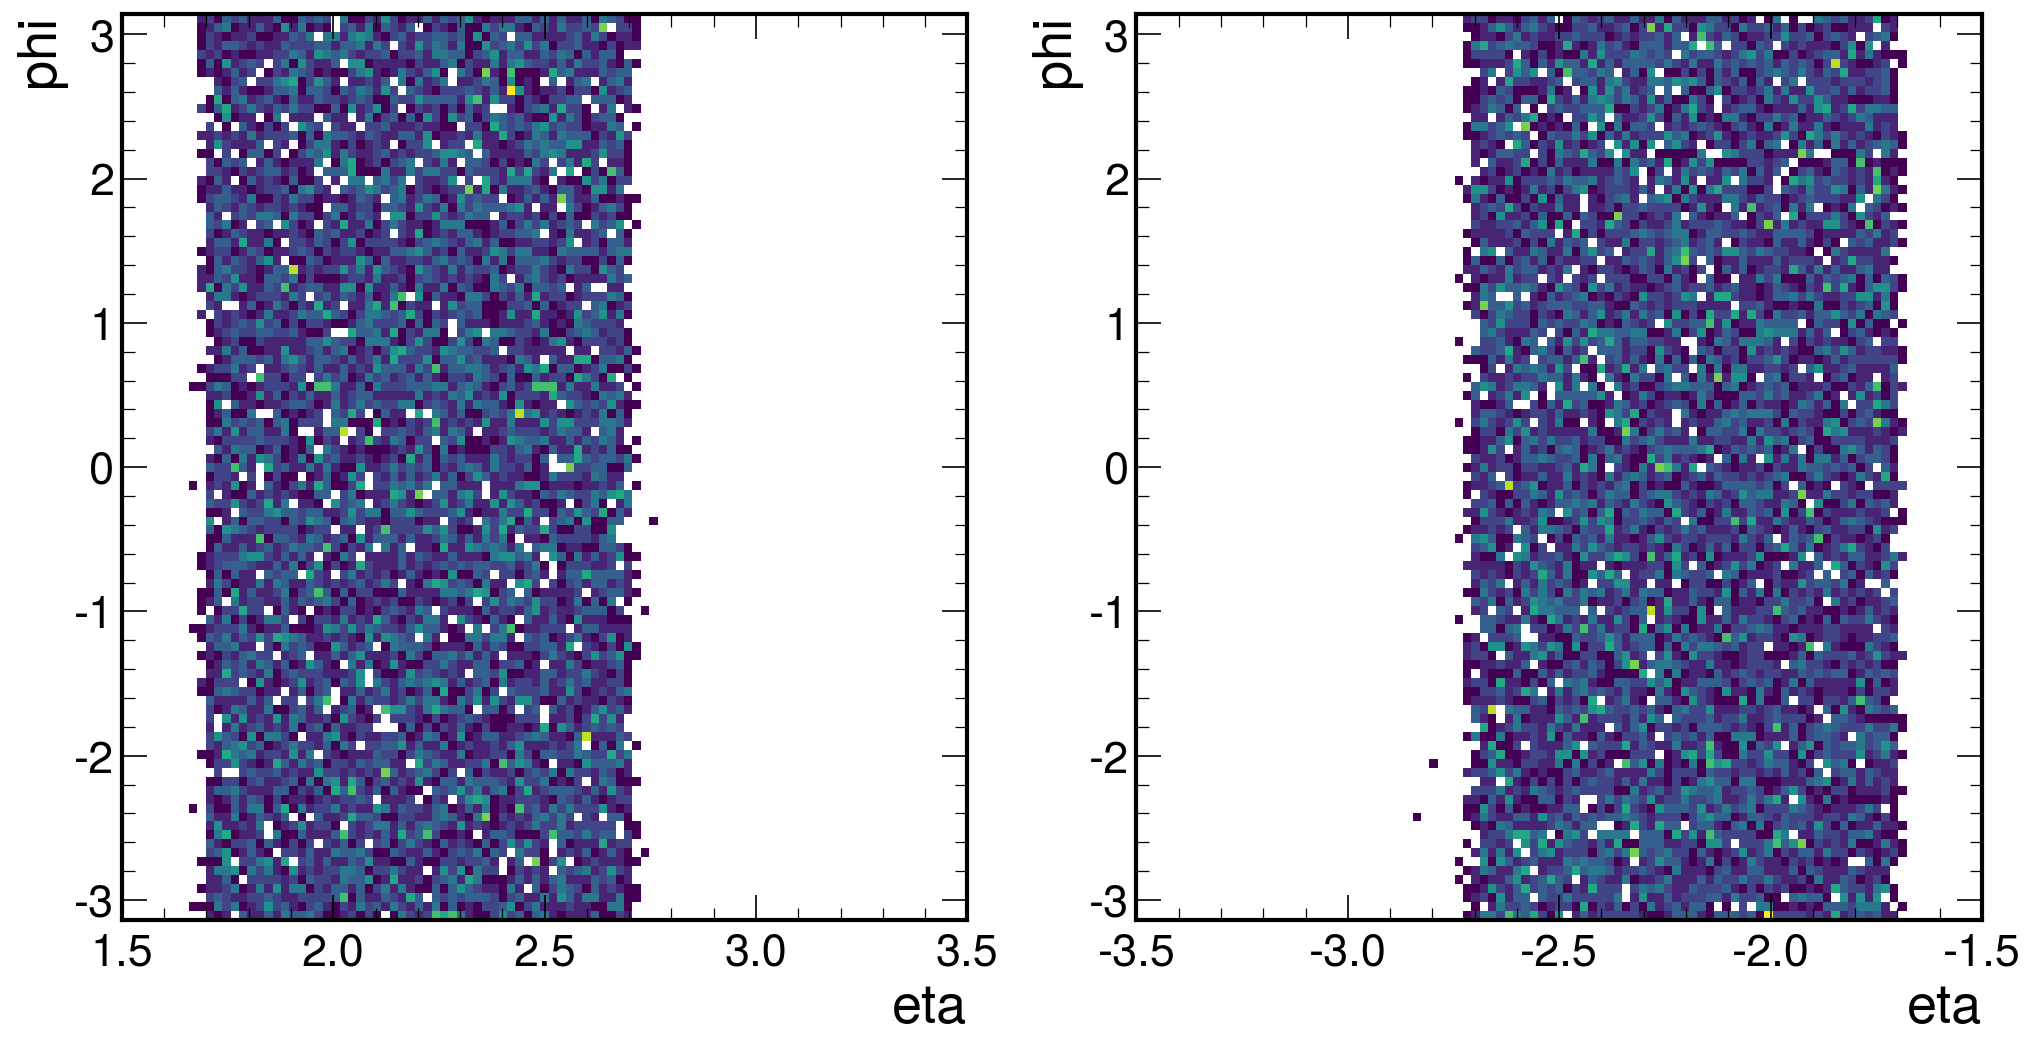

In [5]:
f, ax = plt.subplots(1,2, figsize=(16,8), dpi=150)

zmaskP = df_calo.stsCP_trackster_barycenter_eta > 0 
zmaskM = df_calo.stsCP_trackster_barycenter_eta < 0 

ax[0].hist2d(np.array(ak.flatten(df_calo[zmaskP].stsCP_trackster_barycenter_eta)),
             np.array(ak.flatten(df_calo[zmaskP].stsCP_trackster_barycenter_phi)),
           bins=(101,101), range=((1.5,3.5),(-3.14,3.14)), cmin=1)
ax[0].set_xlabel("eta")
ax[0].set_ylabel("phi")

ax[1].hist2d(np.array(ak.flatten(df_calo[zmaskM].stsCP_trackster_barycenter_eta)),
             np.array(ak.flatten(df_calo[zmaskM].stsCP_trackster_barycenter_phi)),
           bins=(101,101), range=((-3.5,-1.5),(-3.14,3.14)), cmin=1)
ax[1].set_xlabel("eta")
ax[1].set_ylabel("phi")


In [8]:
def in_window_nonumba(calo_eta, calo_phi, calo_z, track_eta, track_phi, track_z, builder):
    deta = 0.1
    dphi = 0.2
    for c_eta, c_phi, c_z, t_eta, t_phi, t_z in zip(calo_eta, calo_phi, calo_z, track_eta, track_phi, track_z):
        builder.begin_list()
        for (ceta, cphi, cz, teta,tphi, tz) in zip(c_eta, c_phi, c_z, t_eta, t_phi, t_z):
            #print(cz, tz, ceta, teta, cphi,tphi)
            same_z = np.sign(cz) == np.sign(tz)
            in_eta = abs(ceta- teta) < deta
            in_phi = abs(((cphi - tphi + np.pi) % (2 * np.pi) - np.pi)) < dphi
            builder.append(same_z & in_eta & in_phi)
        builder.end_list()
    return builder

In [9]:
import numba

@numba.njit
def in_window(calo_eta, calo_phi, calo_z, track_eta, track_phi, track_z, builder):
    deta = 0.1
    dphi = 0.2
    for c_eta, c_phi, c_z, t_eta, t_phi, t_z in zip(calo_eta, calo_phi, calo_z, track_eta, track_phi, track_z):
        builder.begin_list()
        for (ceta, cphi, cz, teta,tphi, tz) in zip(c_eta, c_phi, c_z, t_eta, t_phi, t_z):
            #print(cz, tz, ceta, teta, cphi,tphi)
            same_z = np.sign(cz) == np.sign(tz)
            in_eta = abs(ceta- teta) < deta
            in_phi = abs(((cphi - tphi + np.pi) % (2 * np.pi) - np.pi)) < dphi
            builder.append(same_z & in_eta & in_phi)
        builder.end_list()
    return builder

In [10]:
A = ak.argcartesian([df_calo.stsCP_trackster_barycenter_eta, df_track.trackster_barycenter_eta], axis=1)

In [11]:
A[0].tolist()

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10)]

In [12]:
ak.num(df_calo.stsCP_trackster_barycenter_eta)

<Array [2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2] type='1000 * int64'>

In [13]:
ak.num(df_track.trackster_barycenter_eta)

<Array [11, 4, 3, 5, 8, ... 2, 13, 9, 16, 9] type='1000 * int64'>

In [14]:
calo_idx, track_idx = ak.unzip(A)

In [15]:
df_calo.eta = df_calo.stsCP_trackster_barycenter_eta
df_calo.phi = df_calo.stsCP_trackster_barycenter_phi
df_calo.z = df_calo.stsCP_barycenter_z

df_track.eta = df_track.trackster_barycenter_eta
df_track.phi = df_track.trackster_barycenter_phi
df_track.z = df_track.barycenter_z

In [16]:
all_calo_eta = df_calo.stsCP_trackster_barycenter_eta[calo_idx]
all_calo_phi = df_calo.stsCP_trackster_barycenter_phi[calo_idx]
all_calo_z = df_calo.stsCP_barycenter_z[calo_idx]

all_track_eta = df_track.trackster_barycenter_eta[track_idx]
all_track_phi = df_track.trackster_barycenter_phi[track_idx]
all_track_z = df_track.barycenter_z[track_idx]

In [17]:
%%timeit
out = in_window(all_calo_eta, all_calo_phi, all_calo_z, all_track_eta, all_track_phi,  all_track_z, ak.ArrayBuilder())

1.52 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
out = in_window_nonumba(all_calo_eta, all_calo_phi, all_calo_z, all_track_eta, all_track_phi,  all_track_z, ak.ArrayBuilder())

634 ms ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
out = in_window(all_calo_eta, all_calo_phi, all_calo_z, all_track_eta, all_track_phi,  all_track_z, ak.ArrayBuilder())

In [20]:
goodpairs = A[out]

In [21]:
calo_idx_matched, track_idx_matched = ak.unzip(goodpairs)

In [22]:
calo_idx_matched[4].tolist()

[0, 0, 0, 1, 1, 1]

In [23]:
track_idx_matched[4].tolist()

[2, 3, 4, 5, 6, 7]

In [24]:
import numba
@numba.njit
def calo_match_mask(tcks_indices, indices_to_match,builder):
    for tr_ind, index_to_match in zip(tcks_indices, indices_to_match):
        builder.begin_list()
        #Looping other all the calolist for each trackers
        for trInd in range(len(tr_ind)):    
            calo_indices_for_this_track = tr_ind[trInd]
            #print(calo_indices_for_this_track)
            builder.begin_list()
            for i in range(len(calo_indices_for_this_track)):
                # checking if the index is the one to keep
                if i == index_to_match[trInd]:
                    builder.append(True)
                else:
                    builder.append(False)
            builder.end_list()
        builder.end_list()
    return builder

In [38]:
masked_score  = ak.mask(df_ass.tsCLUE3D_recoToSim_CP_score, df_ass.tsCLUE3D_recoToSim_CP_score<0.1)

In [40]:
masked_score[0].tolist()

[[None, 0.00027781579410657287],
 [None, 2.1496202862181235e-07],
 [None, 0.0005225788918323815],
 [None, 9.978775051422417e-05],
 [None, 2.988124079566384e-15],
 [None, 3.016348637174815e-05],
 [None, 1.6240299373748712e-05],
 [None, 0.0],
 [None, 4.832581907976419e-07],
 [None, 0.00019506074022501707],
 [None, 0.0001176771693280898]]

In [41]:
armin = ak.argmin(masked_score, axis=2)
mask_for_calomatching_trackers = calo_match_mask(df_ass.tsCLUE3D_recoToSim_CP, armin, ak.ArrayBuilder())
trackers_to_calo = ak.flatten(df_ass.tsCLUE3D_recoToSim_CP[mask_for_calomatching_trackers], axis=-1)

In [42]:
trackers_to_calo.tolist()

[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 0, 1],
 [0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 1, 1],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1],
 

In [44]:
goodpairs.tolist()

[[(0, 0), (0, 1), (0, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 10)],
 [(0, 0), (0, 1), (1, 2), (1, 3)],
 [(0, 0), (0, 1), (1, 2)],
 [(0, 0), (0, 1), (1, 2), (1, 3), (1, 4)],
 [(0, 2), (0, 3), (0, 4), (1, 5), (1, 6), (1, 7)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10)],
 [(0, 0), (1, 1), (1, 2)],
 [(0, 0), (0, 1), (0, 2), (1, 3), (1, 4), (1, 5)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9)],
 [(0, 0), (0, 1), (1, 2)],
 [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6)],
 [(0, 0), (0, 2), (0, 3), (1, 4), (1, 5), (1, 7)],
 [(0, 0), (0, 1), (0, 2), (0, 4), (0, 5), (1, 6), (1, 7), (1, 8), (1, 9)],
 [(0, 0), (1, 1), (1, 2)],
 [(0, 0), (0, 1), (0, 2), (1, 3), (1, 4)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3)